In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/archive (13).zip")
df

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,2024-01-01 00:00:00+00:00,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,2024-01-01 01:00:00+00:00,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,2024-01-01 02:00:00+00:00,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,2024-01-01 03:00:00+00:00,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,2024-01-01 04:00:00+00:00,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,Industrial
...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Stockholm,211.0,20.5,1.1,54.0,4.6,10.6,Residential
52700,2024-12-31 20:00:00+00:00,Stockholm,183.0,10.0,0.6,64.0,2.5,6.0,Residential
52701,2024-12-31 21:00:00+00:00,Stockholm,167.0,5.1,0.4,72.0,2.0,4.4,Residential
52702,2024-12-31 22:00:00+00:00,Stockholm,160.0,3.9,0.3,73.0,1.4,2.6,Residential


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   Type    52704 non-null  object 
dtypes: float64(6), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isnull().sum()

,0
Date,0
City,0
CO,0
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
Type,0


In [ ]:
df.isna().sum()

,0
Date,0
City,0
CO,0
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
Type,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns="Date",inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    52704 non-null  object 
 1   CO      52704 non-null  float64
 2   NO2     52704 non-null  float64
 3   SO2     52704 non-null  float64
 4   O3      52704 non-null  float64
 5   PM2.5   52704 non-null  float64
 6   PM10    52704 non-null  float64
 7   Type    52704 non-null  object 
dtypes: float64(6), object(2)
memory usage: 3.2+ MB


In [ ]:
df.head()

,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,Industrial


# Univariate Analysis

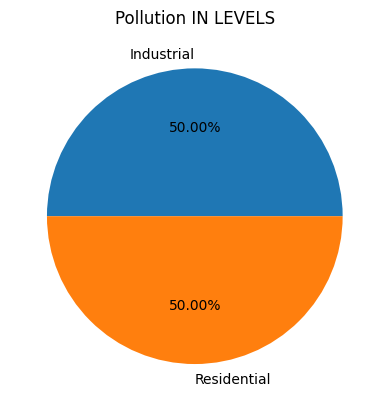

In [ ]:
#df["Industrial"].value_counts()
Levels =df["Type"].value_counts()
plt.pie(Levels.values,labels=Levels.index,autopct="%0.2f%%")
plt.title("Pollution IN LEVELS")
plt.show()

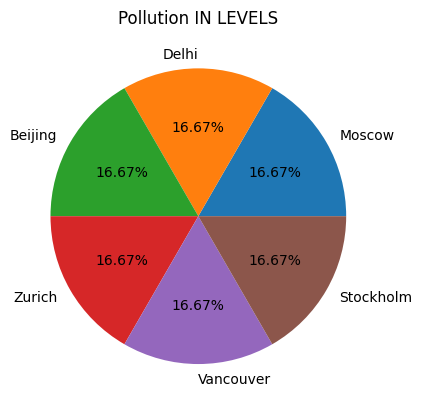

In [ ]:
Levels =df["City"].value_counts()
plt.pie(Levels.values,labels=Levels.index,autopct="%0.2f%%")
plt.title("Pollution IN LEVELS")
plt.show()

# Bivariate Analysis

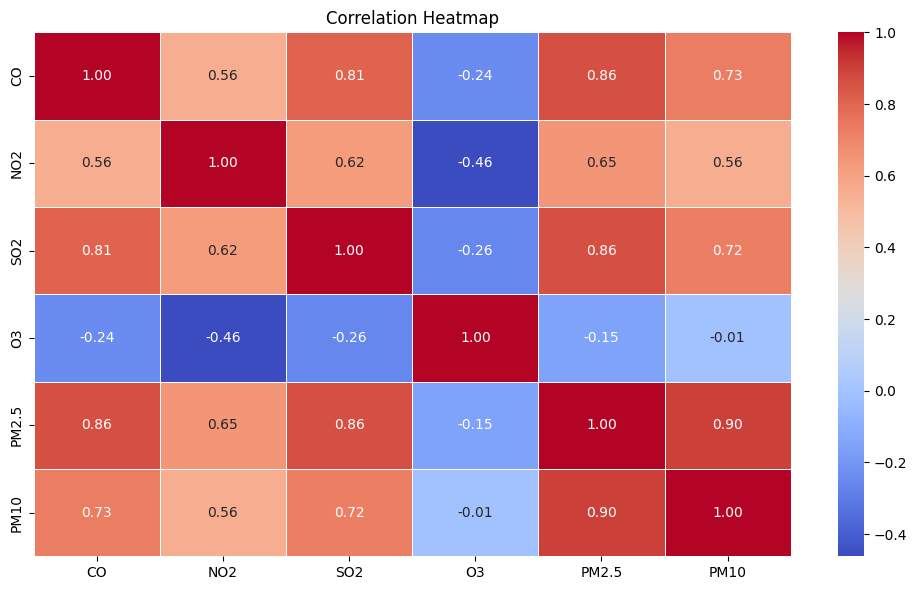

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
# Splitting into x and y
y = df["Type"]
x = df.drop(columns = "Type")
print(y.shape)
print(x.shape)

(52704,)
(52704, 7)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42163, 7)
(10541, 7)
(42163,)
(10541,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42163 entries, 22922 to 15248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    42163 non-null  object 
 1   CO      42163 non-null  float64
 2   NO2     42163 non-null  float64
 3   SO2     42163 non-null  float64
 4   O3      42163 non-null  float64
 5   PM2.5   42163 non-null  float64
 6   PM10    42163 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [ ]:
# Create a pipeline using make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
transformer = ColumnTransformer(transformers=[("t1", OneHotEncoder(),[0]),("t2",RobustScaler(),[1,2,3,4,5,6])])
pipe = make_pipeline(transformer,KNeighborsClassifier())

In [ ]:
# Building MOdel
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', OneHotEncoder(), [0]),
                                                 ('t2', RobustScaler(),
                                                  [1, 2, 3, 4, 5, 6])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Creating the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

# Correcting the column index for OrdinalEncoder to 0 (City column)
pipe = Pipeline(steps = [("t1",ColumnTransformer(transformers=[("t1",OneHotEncoder(),[0]),("t2",RobustScaler(),[1,2,3,4,5,6])])),("t3",KNeighborsClassifier(n_neighbors=5,p=1,metric="minkowski"))])

In [ ]:
# Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('t1',
                 ColumnTransformer(transformers=[('t1', OneHotEncoder(), [0]),
                                                 ('t2', RobustScaler(),
                                                  [1, 2, 3, 4, 5, 6])])),
                ('t3', KNeighborsClassifier(p=1))])

In [ ]:
# Make prediction
y_pred = pipe.predict(X_test)
y_pred

array(['Residential', 'Industrial', 'Industrial', ..., 'Industrial',
       'Residential', 'Residential'], dtype=object)

In [ ]:
# Validation of Model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(score)

1.0


In [ ]:
# Let us make predictions use train data
# Predict on train data
y_pred_train = pipe.predict(X_train)
score_train = accuracy_score(y_train, y_pred_train)

# Predict on test data
y_pred_test = pipe.predict(X_test)
y_pred_test

array(['Residential', 'Industrial', 'Industrial', ..., 'Industrial',
       'Residential', 'Residential'], dtype=object)

In [ ]:
score_test = accuracy_score(y_test, y_pred_test)
print("Train  accuracy_score:", score_train)
print("Test  accuracy_score:", score_test)

Train  accuracy_score: 1.0
Test  accuracy_score: 1.0


In [ ]:
import pandas as pd

# Example input with random realistic pollution values and a city
new_data = pd.DataFrame([{
    "City": "Stockholm",  # use any city seen in training or allow unknown in encoder
    "CO": 143.0,
    "NO2": 2.1,
    "SO2": 0.1,
    "O3": 72.0,
    "PM2.5": 2.3,
    "PM10": 3.9
}])


In [ ]:
prediction = pipe.predict(new_data)
print("Predicted Type:", prediction)


Predicted Type: ['Residential']


In [ ]:
probs = pipe.predict_proba(new_data)
print("Prediction Probabilities:", probs)


Prediction Probabilities: [[0. 1.]]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 1.0


In [ ]:
# Pickling the pipe object
import pickle
with open("ML_Project_Classification.pkl","wb") as f:
  pickle.dump(pipe,f)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42163 entries, 22922 to 15248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    42163 non-null  object 
 1   CO      42163 non-null  float64
 2   NO2     42163 non-null  float64
 3   SO2     42163 non-null  float64
 4   O3      42163 non-null  float64
 5   PM2.5   42163 non-null  float64
 6   PM10    42163 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [ ]:
df["City"].unique()

array(['Moscow', 'Delhi', 'Beijing', 'Zurich', 'Vancouver', 'Stockholm'],
      dtype=object)

In [ ]:
# Creating the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

# Correcting the column index for OrdinalEncoder to 0 (City column)
pipe = Pipeline(steps = [("t1",ColumnTransformer(transformers=[("t1",OneHotEncoder(),[0]),("t2",RobustScaler(),[1,2,3,4,5,6])])),("t3", DecisionTreeClassifier(criterion="gini"))])

In [ ]:
# Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('t1',
                 ColumnTransformer(transformers=[('t1', OneHotEncoder(), [0]),
                                                 ('t2', RobustScaler(),
                                                  [1, 2, 3, 4, 5, 6])])),
                ('t3', DecisionTreeClassifier())])

In [ ]:
# Make prediction
y_pred = pipe.predict(X_test)
y_pred

array(['Residential', 'Industrial', 'Industrial', ..., 'Industrial',
       'Residential', 'Residential'], dtype=object)

In [ ]:
# Validation of Model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(score)

1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# ----------------------------
# 1. Define categorical & numeric columns
# ----------------------------
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# ----------------------------
# 2. Preprocessor: scale numeric + one-hot encode categorical
# ----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ----------------------------
# 3. Define classifiers
# ----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# ----------------------------
# 4. Train & Evaluate
# ----------------------------
results = {}

for name, model in classifiers.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)

from sklearn.preprocessing import LabelEncoder


# ----------------------------
# 5. Results DataFrame
# ----------------------------
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print(results_df)


Logistic Regression: 1.0000
              precision    recall  f1-score   support

  Industrial       1.00      1.00      1.00      5329
 Residential       1.00      1.00      1.00      5212

    accuracy                           1.00     10541
   macro avg       1.00      1.00      1.00     10541
weighted avg       1.00      1.00      1.00     10541

--------------------------------------------------
KNN: 1.0000
              precision    recall  f1-score   support

  Industrial       1.00      1.00      1.00      5329
 Residential       1.00      1.00      1.00      5212

    accuracy                           1.00     10541
   macro avg       1.00      1.00      1.00     10541
weighted avg       1.00      1.00      1.00     10541

--------------------------------------------------
SVM: 1.0000
              precision    recall  f1-score   support

  Industrial       1.00      1.00      1.00      5329
 Residential       1.00      1.00      1.00      5212

    accuracy                

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Industrial' 'Residential']

In [ ]:
|from sklearn.preprocessing import LabelEncoder

# Encode target for XGBoost only
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

results = {}

for name, model in classifiers.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    if name == "XGBoost":
        # Use encoded target
        clf.fit(X_train, y_train_enc)
        y_pred = clf.predict(X_test)
        y_pred = le.inverse_transform(y_pred)  # convert back to original labels
        acc = accuracy_score(y_test, y_pred)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

    results[name] = acc
    print(f"{name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)
